# Homework 8 Solutions

Computational Physics Fall 2025 

# Probelm 1: SVD Practice

## Part A

In [1]:
from numpy import array, eye, set_printoptions
from numpy.linalg import svd
set_printoptions(suppress=True)

# Here is the matrix from the pset
A = array([
    [ -5,  2,  0, -2, -3],
    [  3,  1,  0, -5,  4],
    [ -7,  2,  1, -1,  1],
    [  4,  6, -2, 4,  -2],
    [ -5, -2,  3,-15, 11]])

# Obtain the svd
U, S, Vt = svd(A)
W = eye(len(S))*S
V = Vt.T

# Print out the things
print(f"The rank of A is {sum(S>1e-10)}")
print(f"The nulity of A is {sum(S<1e-10)}")
print("Therefore A is singular\n")

# Compute the Pseudoinverse
Sinv = array([1/s if abs(s) > 1e-10 else 0 for s in S])
Ainv = V.dot(eye(len(Sinv))*Sinv).dot(U.T)

# Let's print it also 
print("The pseudoinvese is\n",Ainv)

The rank of A is 4
The nulity of A is 1
Therefore A is singular

The pseudoinvese is
 [[-0.003663    0.05494505 -0.09798535  0.01831502 -0.00641026]
 [ 0.02808303  0.03907204  0.06471306  0.12942613  0.01343101]
 [-0.03785104 -0.01953602  0.02716728 -0.01709402  0.00518926]
 [-0.15873016 -0.06349206  0.11507937  0.01587302 -0.02777778]
 [-0.2026862  -0.02319902  0.12973138  0.04517705  0.03815629]]


# Part B

The columns of $U$ corresponding to the image have nonzero singular values. Here they are

In [2]:
# Calculate a basis for the image
from numpy import where

# Get the indices of the nonsingular values
nonsingular_idx, = where(abs(S) > 1e-10)

# Get the basis for the range
A_range = U.T[nonsingular_idx]              # These are 4 by the way
x_range = [Ainv.dot(b) for b in A_range]    # Their closest solutions are these

## Part C

The columns of $V$ corresponding to the kernel have singular values 0. So let's extract them.

In [3]:
# Extract a basis for the nullspace
singular_idx, = where(abs(S) < 1e-10)

# Get the basis for the range
A_null = V.T[singular_idx][0]                       # This is just one poor singular vector

# Check that the vectors perturbed by the null space are the same
print(array([sum(A.dot(x + A_null) - A.dot(x)) for x in x_range]))

[0. 0. 0. 0.]


## Part D

We want to find something perpendicular to that range. Effectively what we need to do is to find the null space. To do this we use gaussian Elimination on the range of vectors.

In [4]:
# Calculate the peropedicular vector using SVD
v = svd(A_range).Vh[-1]

# Let's add it and obtain the closest solutions.
A_perp = A_range + v

# Now calculate the closest solutions
x_perp = array([Ainv.dot(x) for x in A_perp])
print(x_perp)

[[ 0.0139102   0.00650322 -0.0075806   0.0353624  -0.0250702 ]
 [-0.09315727  0.00773108  0.00818987  0.01125267 -0.03628698]
 [ 0.00321672  0.14996547 -0.0238696  -0.0268968   0.00996457]
 [ 0.06424888 -0.02903227 -0.04666106 -0.20345212 -0.24474975]]


# Problem 2: Asymmetric Quantum Well

## Part A

In order to not have to constantly write $\frac{2\pi n}{L}$ let's rescale everything under $x\mapsto Lx$. Now the hamiltonian is written as
$$
\hat H = -\frac{\hbar^2}{2ML^2} \frac{d^2}{dx^2} + V(x),
$$
where $x$ now is in the unit interval and is instead unitless. Therefore we can plug in
$$
\psi(x) = \sum_{n\in \mathbb{N}} \psi_n \sin \pi n x,
$$
to the Schordinger equation to obtain
$$
\sum_{n\in \mathbb{N}} E\psi_n \sin\pi n x = \sum_{n \in \mathbb{N}} \psi_n \left[ \frac{\hbar^2 \pi^2 n^2}{2ML^2} + V(x)\right] \sin \pi n x.
$$
Now we will isolate the modes by using the fact that
$$
\int_{0}^{1} \sin \pi m x \sin\pi n x \, dx= \frac{\delta_{nm}}{2}.
$$
We multiply both sides by $\sin \pi m x$ to obtain
$$
\psi_m = \sum_{n \in \mathbb{N}} \psi_n \left[\frac{\hbar^2 \pi^2 n^2}{2 EML^2} \delta_{nm} + \frac{2}{E}\int_{0}^{1} V(x) \sin\pi n x \sin \pi m x\, dx\right] 
$$
So by introducing the matrix
$$
H_{nm} = \frac{\hbar^2 \pi^2 n^2}{2ML^2} \delta_{nm} + 2\int_{0}^{1} V(x) \sin\pi n x \sin \pi m x\, dx
$$
we can write
$$
H\psi = E \psi.
$$

## Part B

If we pick $V = ax$ for some constant $a \in \mathbb{R}$ we have that
$$
\begin{align*}
\int_{0}^{1} a x \sin \pi n x \sin \pi m x\, dx 
&= \frac{2 a}{ \pi^2} \frac{mn[(-1)^{m+n} -1]}{(m^2-n^2)^2},
\end{align*} 
$$
for $m\neq \pm n$. If $m=0$ or $n=0$ this integral is also zero. If $m=\pm n \neq 0$ we have that this integral is $\frac{a}{4}$

Before we write this up it is convenient to do some nondimensionalization. Let's define
$$
\alpha = \frac{2ML^2}{\hbar^2 \pi^2} a.
$$
Now we can define $H = \frac{\hbar^2 \pi^2}{2ML^2} h$ where $h$ is a nondimensional matrix
$$
h_{mn} = \frac{4\alpha}{\pi^2} \frac{mn[(-1)^{m+n} -1]}{(m^2-n^2)^2},
$$
for $n\neq m$
and
$$
h_{nn} = n^2 + \frac{\alpha}{2}.
$$
Let's write this up now.


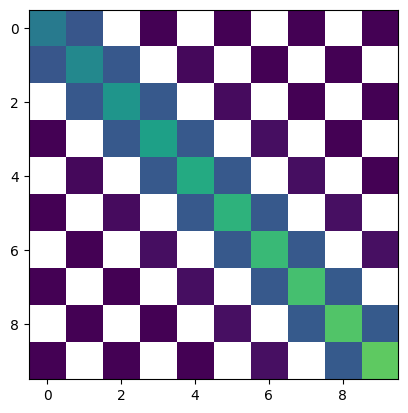

In [5]:
# Import a bunch of constants
from scipy.constants import hbar, pi, electron_mass, angstrom, electron_volt
from matplotlib.pyplot import imshow
from matplotlib.colors import LogNorm

# The constants of the problem
L  = 5 * angstrom                                       # The Length of the Well
EE = hbar**2 * pi**2/(2 * electron_mass * L**2)         # Define an overall scaling constant which has units of energy
aa = 10 * electron_volt                                 # The dimensional slope of the potential
a  = aa/(EE)                                            # The nondimensional slope of the potential

# To obtain the nondimensional matrix
def get_nondimensional_h(a:float = a, N:int = 10):
    delta = lambda m,n: 1 if m == n else 0
    h = lambda n,m: n**2 * delta(m,n) +  (0 if m==0 or n==0 else a/2 if abs(n) == abs(m) else (4 * a /pi**2 ) * m*n*((-1)**((m+n)%2) -1)/(n**2 - m**2)**2 )
    return array([[h(n,m) for m in range(1,N+1)] for n in range(1,N+1)])

# We can calculate some of the elements of the matrix H as follows
N = 10
h = get_nondimensional_h(a,N)

# Here is a picture to verify that H is claculated correctly
imshow(abs(h), norm=LogNorm(vmin = 1e-1,vmax = 2**N))

This checkerboard pattern is expected because the potential term is zero when m,n are both even or both odd. 

## Parts C & D

The ground state energy is E = 5.836 eV



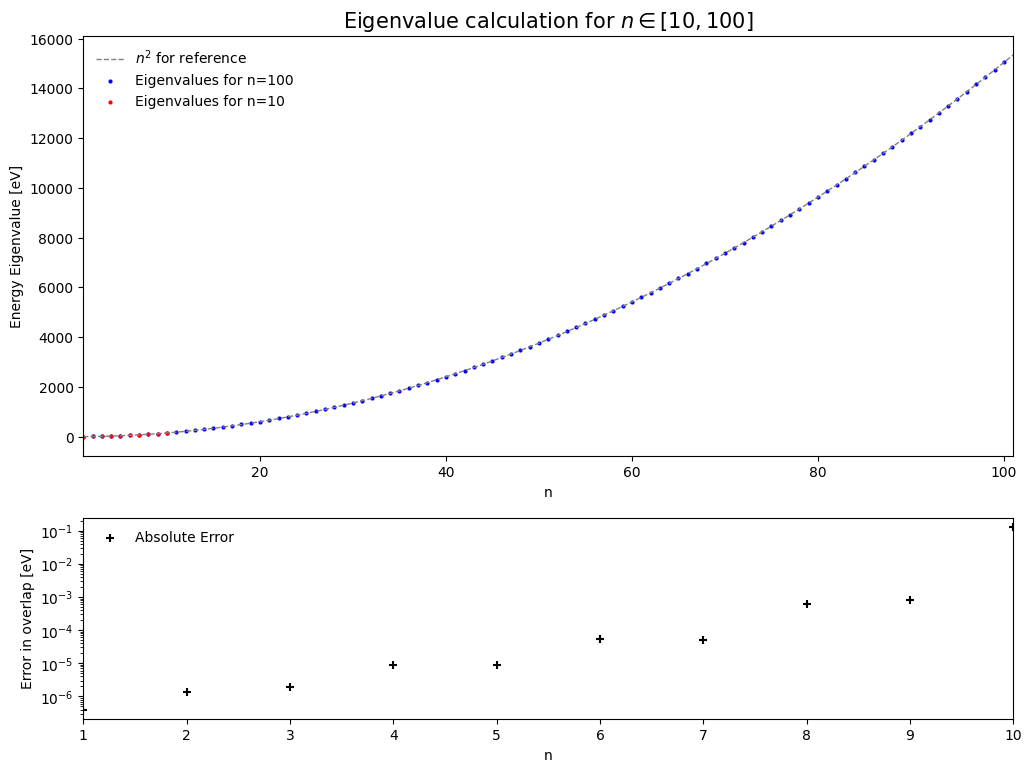

In [6]:
from numpy import sort,linspace
from numpy.linalg import eig
import matplotlib.pyplot as plt

# Calculate the eigenvalues for different dimensions. 
N = [10,100]
h = {n: get_nondimensional_h(a,n) for n in N}
E = {n: sort(eig(h[n]).eigenvalues * EE / electron_volt) for n in h}

# Evaluate the error in the overlap
error = abs(E[N[0]] - E[N[1]][:N[0]])

# PLOTTING ---------------------------------------------------
fig     = plt.figure(figsize=(12,12))
ax1     = fig.add_subplot(211)
ax2     = fig.add_subplot(413)
color   = {N[0]:'r', N[1]:'b'}
x       = linspace(1,max(N)+1,500)

# Add the plot elements
ax1.plot(x,(EE/electron_volt)*x**2, c='grey', lw=1, ls='--', label=r"$n^2$ for reference")
for n in reversed(E):
    ax1.scatter(list(range(1,n+1)), E[n], c=color[n], s=4, marker='o', label=f"Eigenvalues for n={n:d}")
ax2.scatter(list(range(1,N[0]+1)),error, marker='+', c='k', label="Absolute Error")

# Some prettification steps
ax1.set_title(r"Eigenvalue calculation for $n \in [10,100]$",fontsize=15)
ax1.legend(frameon=False)
ax1.set_ylabel(r'Energy Eigenvalue [eV]')
ax1.set_xlabel(r'n')
ax1.set_xlim(x[0],x[-1])
ax2.set_ylabel('Error in overlap [eV]')
ax2.set_xlabel('n')
ax2.legend(frameon=False, loc="upper left")
ax2.set_xlim(1,N[0])
ax2.set_yscale('log')


# Print about the ground state
print(f"The ground state energy is E = {E[N[0]][0]:.3f} eV\n")